In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta

#Create test data
lastdate = date.today()
vmin = 0
vmax = 50
rowcount = 31
tpl_colname = ('A','B','C','D')
colcount = len(tpl_colname)

data = np.random.randint(vmin, vmax+1, (rowcount, colcount))
rdate = pd.date_range(lastdate-timedelta(days=rowcount),periods=rowcount)
df = pd.DataFrame(data, index=rdate, columns=tpl_colname)

In [82]:
df.head(1)

,A,B,C,D
2023-07-14,42,22,15,30


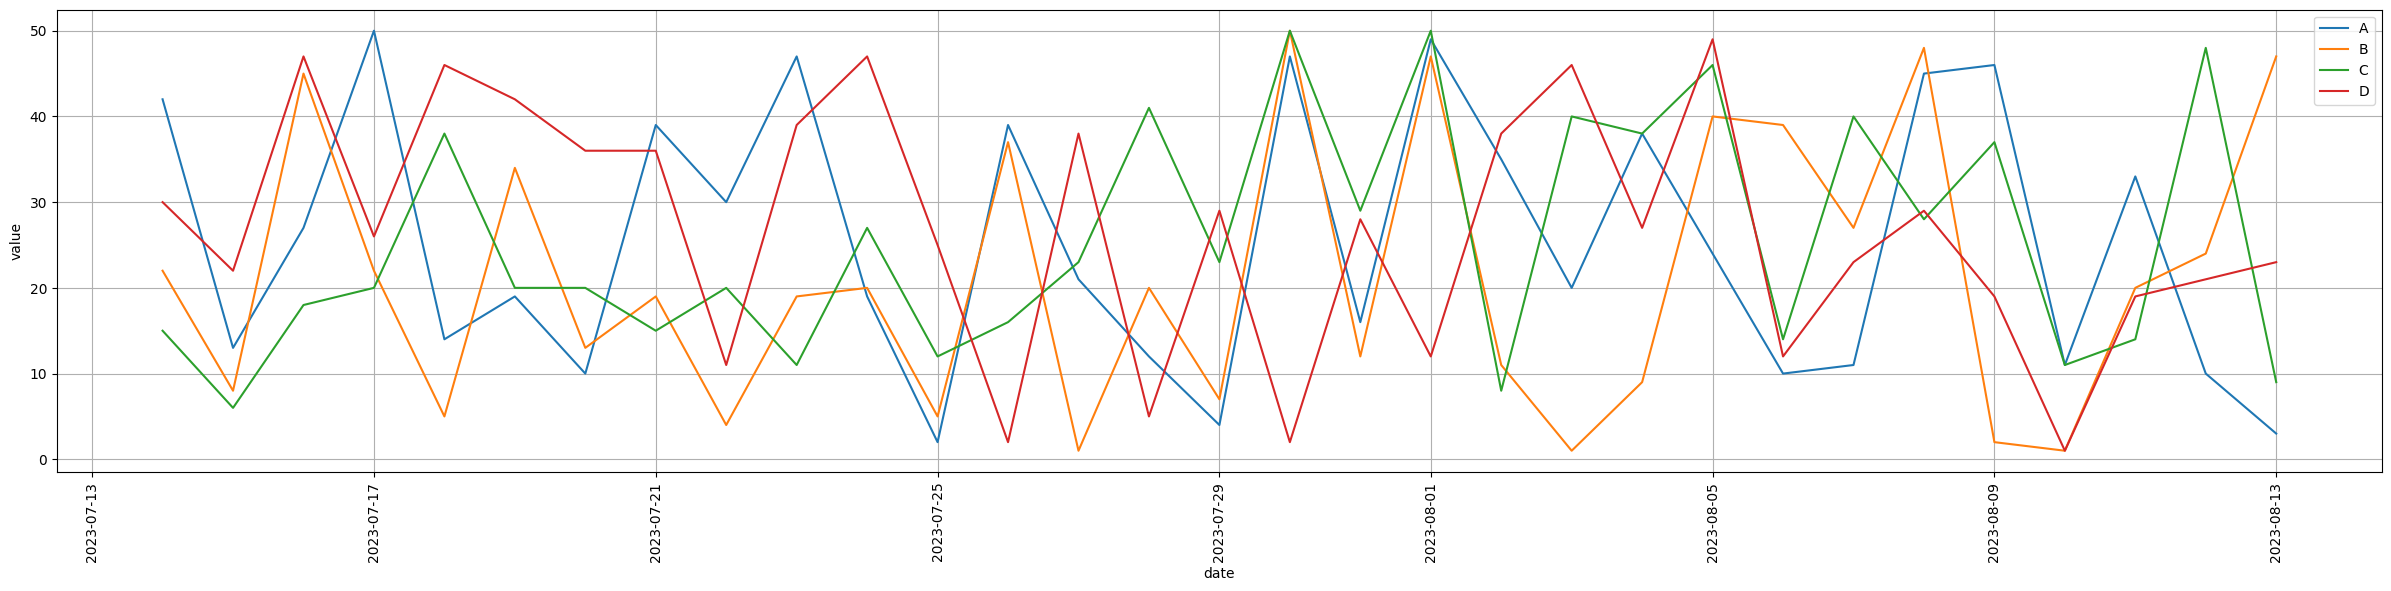

In [83]:
plt.figure(figsize=(30, 6))
plt.plot(df.index, df['A'], label='A')
plt.plot(df.index, df['B'], label='B')
plt.plot(df.index, df['C'], label='C')
plt.plot(df.index, df['D'], label='D')
plt.xlabel('date')
plt.ylabel('value')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

In [84]:
#単純移動平均(Simple Moving Average; SMA)

moving_average_periods = [3, 5, 7]
for col in tpl_colname:
  for period in moving_average_periods:
    col_name = f"{col}_{period}-Day-SMA"
    df[col_name] = df[col].rolling(period).mean().round(1)

df.head(8)

,A,B,C,D,A_3-Day-SMA,A_5-Day-SMA,A_7-Day-SMA,B_3-Day-SMA,B_5-Day-SMA,B_7-Day-SMA,C_3-Day-SMA,C_5-Day-SMA,C_7-Day-SMA,D_3-Day-SMA,D_5-Day-SMA,D_7-Day-SMA
2023-07-14,42,22,15,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-15,13,8,6,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-16,27,45,18,47,27.3,NaN,NaN,25.0,NaN,NaN,13.0,NaN,NaN,33.0,NaN,NaN
2023-07-17,50,22,20,26,30.0,NaN,NaN,25.0,NaN,NaN,14.7,NaN,NaN,31.7,NaN,NaN
2023-07-18,14,5,38,46,30.3,29.2,NaN,24.0,20.4,NaN,25.3,19.4,NaN,39.7,34.2,NaN
2023-07-19,19,34,20,42,27.7,24.6,NaN,20.3,22.8,NaN,26.0,20.4,NaN,38.0,36.6,NaN
2023-07-20,10,13,20,36,14.3,24.0,25.0,17.3,23.8,21.3,26.0,23.2,19.6,41.3,39.4,35.6
2023-07-21,39,19,15,36,22.7,26.4,24.6,22.0,18.6,20.9,18.3,22.6,19.6,38.0,37.2,36.4


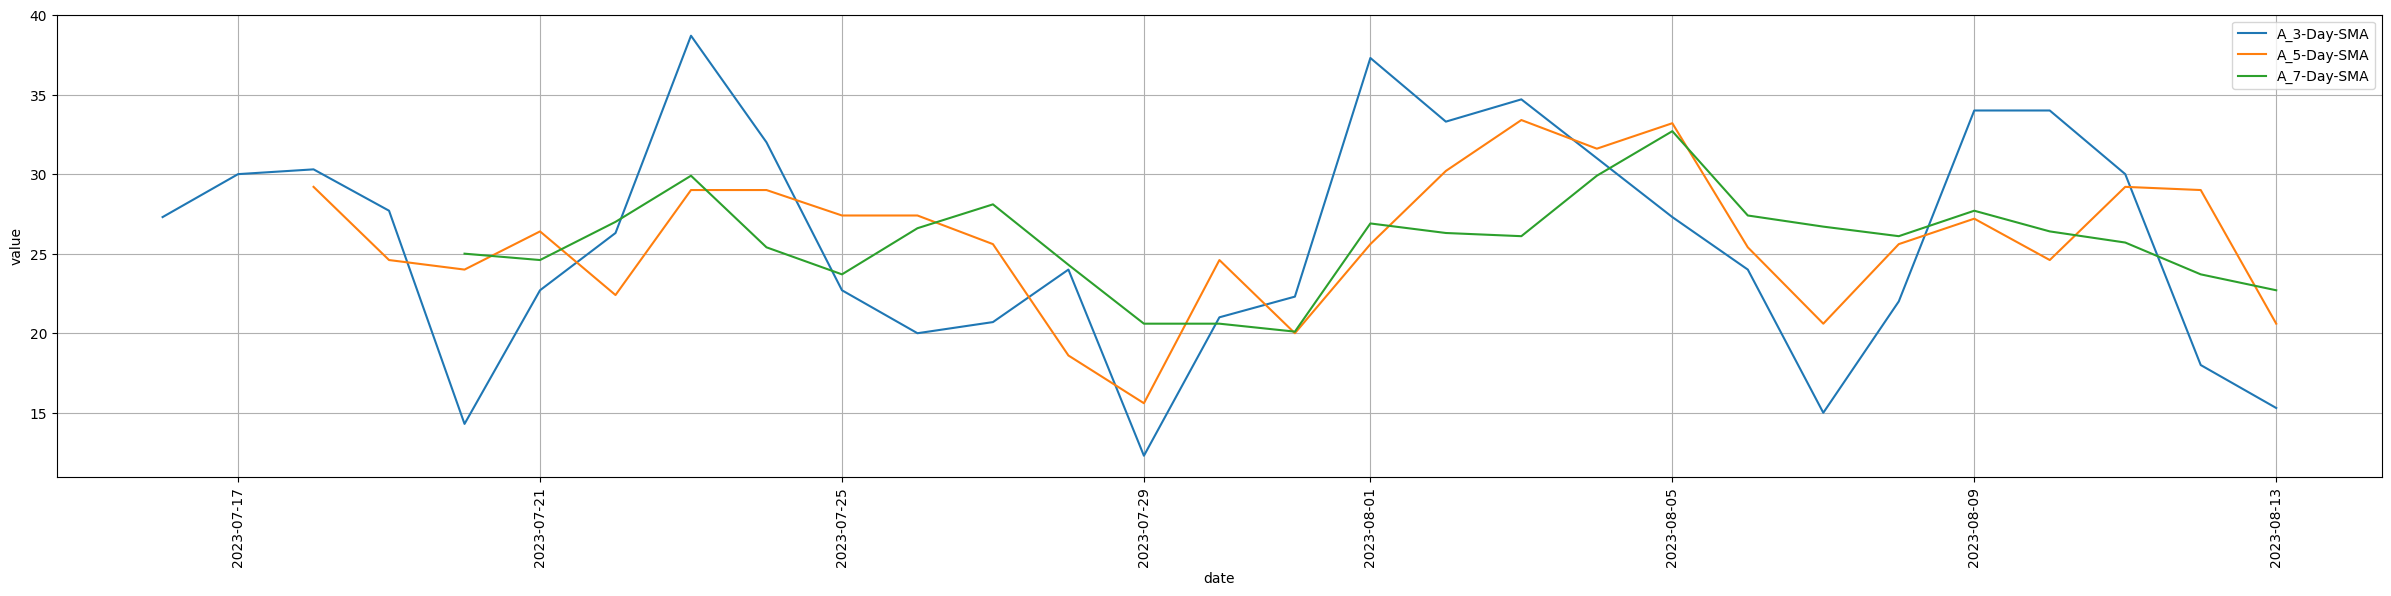

In [85]:
plt.figure(figsize=(30, 6))
plt.plot(df.index, df['A_3-Day-SMA'], linestyle = "solid", label='A_3-Day-SMA')
plt.plot(df.index, df['A_5-Day-SMA'], linestyle = "solid", label='A_5-Day-SMA')
plt.plot(df.index, df['A_7-Day-SMA'], linestyle = "solid", label='A_7-Day-SMA')
plt.xlabel('date')
plt.ylabel('value')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

In [86]:
#加重移動平均(Weighted Moving Average; WMA)

def wma(value):
    weight = np.arange(len(value)) + 1
    wma = np.sum(weight * value) / weight.sum()

    return wma

for col in tpl_colname:
  for period in moving_average_periods:
    col_name = f"{col}_{period}-Day-WMA"
    df[col_name] = df[col].rolling(period).apply(wma, raw=True).round(1)

df.head(8)

,A,B,C,D,A_3-Day-SMA,A_5-Day-SMA,A_7-Day-SMA,B_3-Day-SMA,B_5-Day-SMA,B_7-Day-SMA,...,A_7-Day-WMA,B_3-Day-WMA,B_5-Day-WMA,B_7-Day-WMA,C_3-Day-WMA,C_5-Day-WMA,C_7-Day-WMA,D_3-Day-WMA,D_5-Day-WMA,D_7-Day-WMA
2023-07-14,42,22,15,30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-15,13,8,6,22,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-16,27,45,18,47,27.3,NaN,NaN,25.0,NaN,NaN,...,NaN,28.8,NaN,NaN,13.5,NaN,NaN,35.8,NaN,NaN
2023-07-17,50,22,20,26,30.0,NaN,NaN,25.0,NaN,NaN,...,NaN,27.3,NaN,NaN,17.0,NaN,NaN,32.3,NaN,NaN
2023-07-18,14,5,38,46,30.3,29.2,NaN,24.0,20.4,NaN,...,NaN,17.3,19.1,NaN,28.7,23.4,NaN,39.5,36.6,NaN
2023-07-19,19,34,20,42,27.7,24.6,NaN,20.3,22.8,NaN,...,NaN,22.3,23.6,NaN,26.0,23.6,NaN,40.7,39.2,NaN
2023-07-20,10,13,20,36,14.3,24.0,25.0,17.3,23.8,21.3,...,21.5,18.7,20.3,20.8,23.0,23.5,21.8,39.7,39.0,37.6
2023-07-21,39,19,15,36,22.7,26.4,24.6,22.0,18.6,20.9,...,25.0,19.5,18.7,20.2,17.5,20.7,20.7,37.0,37.9,37.7


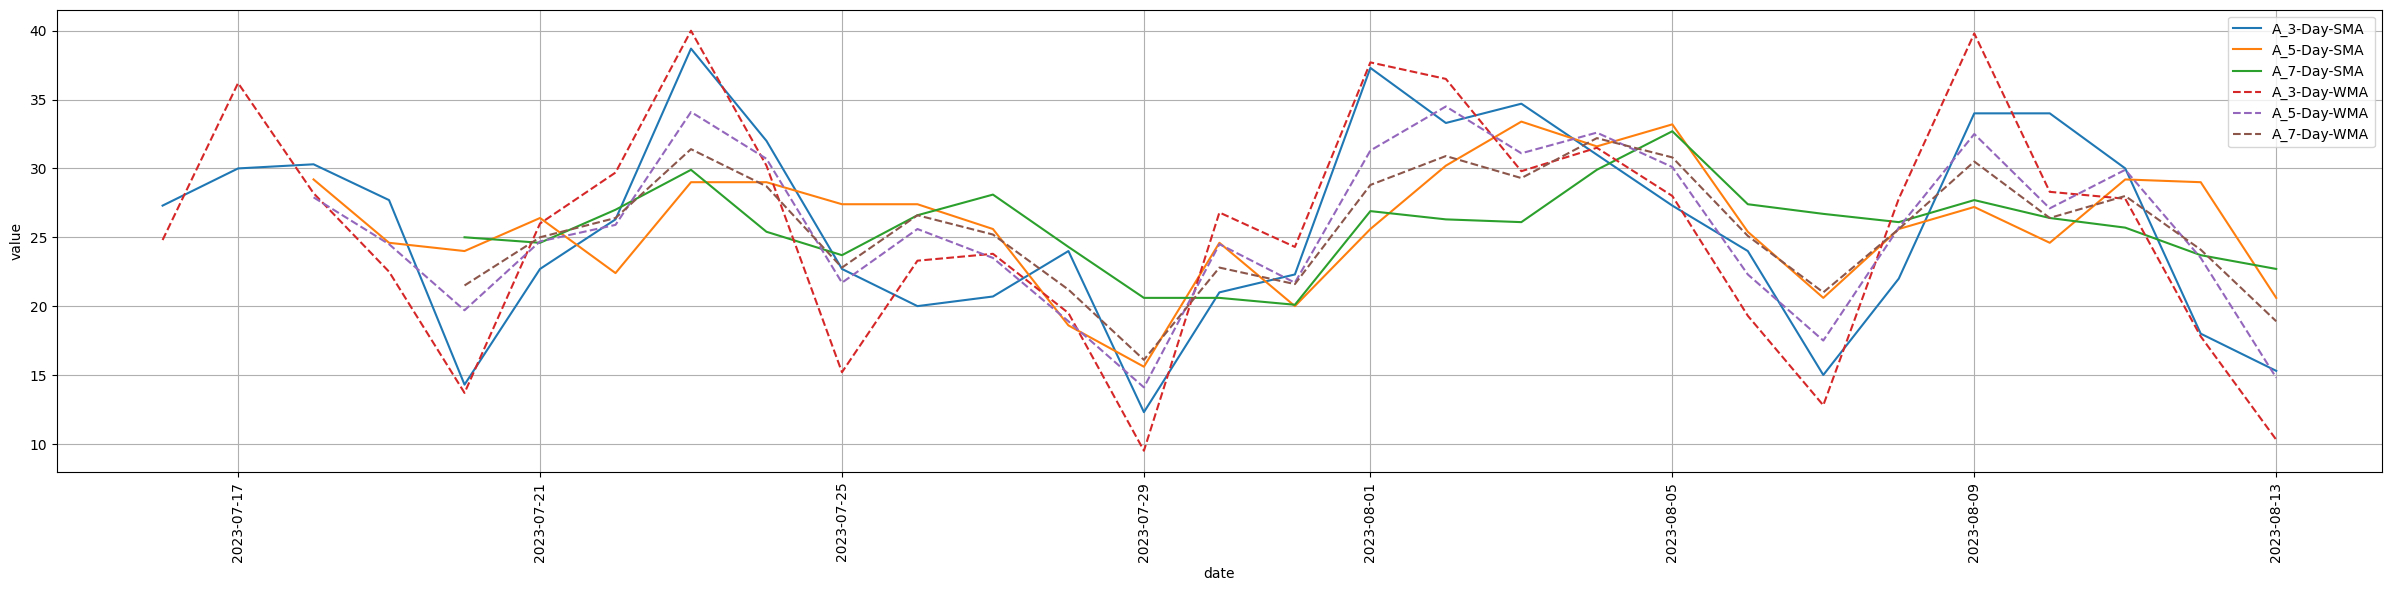

In [87]:
plt.figure(figsize=(30, 6))
plt.plot(df.index, df['A_3-Day-SMA'], linestyle = "solid", label='A_3-Day-SMA')
plt.plot(df.index, df['A_5-Day-SMA'], linestyle = "solid", label='A_5-Day-SMA')
plt.plot(df.index, df['A_7-Day-SMA'], linestyle = "solid", label='A_7-Day-SMA')
plt.plot(df.index, df['A_3-Day-WMA'], linestyle = "dashed",label='A_3-Day-WMA')
plt.plot(df.index, df['A_5-Day-WMA'], linestyle = "dashed",label='A_5-Day-WMA')
plt.plot(df.index, df['A_7-Day-WMA'], linestyle = "dashed",label='A_7-Day-WMA')
plt.xlabel('date')
plt.ylabel('value')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

In [88]:
#指数移動平均(Exponential Moving Average; EMA)

def ema(value, periods):
    ema = np.zeros(len(value))
    ema[:] = np.nan # NaN で一旦初期化
    ema[periods-1] = value[:periods].mean() # 最初だけ単純移動平均で算出

    for day in range(periods, len(value)):
        ema[day] = ema[day-1] + (value[day] - ema[day-1]) / (periods + 1) * 2

    return ema

for col in tpl_colname:
  for period in moving_average_periods:
    col_name = f"{col}_{period}-Day-EMA"
    df[col_name] = ema(df[col], period).round(1)

df.head(10)

,A,B,C,D,A_3-Day-SMA,A_5-Day-SMA,A_7-Day-SMA,B_3-Day-SMA,B_5-Day-SMA,B_7-Day-SMA,...,A_7-Day-EMA,B_3-Day-EMA,B_5-Day-EMA,B_7-Day-EMA,C_3-Day-EMA,C_5-Day-EMA,C_7-Day-EMA,D_3-Day-EMA,D_5-Day-EMA,D_7-Day-EMA
2023-07-14,42,22,15,30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-15,13,8,6,22,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-16,27,45,18,47,27.3,NaN,NaN,25.0,NaN,NaN,...,NaN,25.0,NaN,NaN,13.0,NaN,NaN,33.0,NaN,NaN
2023-07-17,50,22,20,26,30.0,NaN,NaN,25.0,NaN,NaN,...,NaN,23.5,NaN,NaN,16.5,NaN,NaN,29.5,NaN,NaN
2023-07-18,14,5,38,46,30.3,29.2,NaN,24.0,20.4,NaN,...,NaN,14.2,20.4,NaN,27.2,19.4,NaN,37.8,34.2,NaN
2023-07-19,19,34,20,42,27.7,24.6,NaN,20.3,22.8,NaN,...,NaN,24.1,24.9,NaN,23.6,19.6,NaN,39.9,36.8,NaN
2023-07-20,10,13,20,36,14.3,24.0,25.0,17.3,23.8,21.3,...,25.0,18.6,21.0,21.3,21.8,19.7,19.6,37.9,36.5,35.6
2023-07-21,39,19,15,36,22.7,26.4,24.6,22.0,18.6,20.9,...,28.5,18.8,20.3,20.7,18.4,18.2,18.4,37.0,36.4,35.7
2023-07-22,30,4,20,11,26.3,22.4,27.0,12.0,15.0,20.3,...,28.9,11.4,14.9,16.5,19.2,18.8,18.8,24.0,27.9,29.5
2023-07-23,47,19,11,39,38.7,29.0,29.9,14.0,17.8,16.6,...,33.4,15.2,16.2,17.2,15.1,16.2,16.9,31.5,31.6,31.9


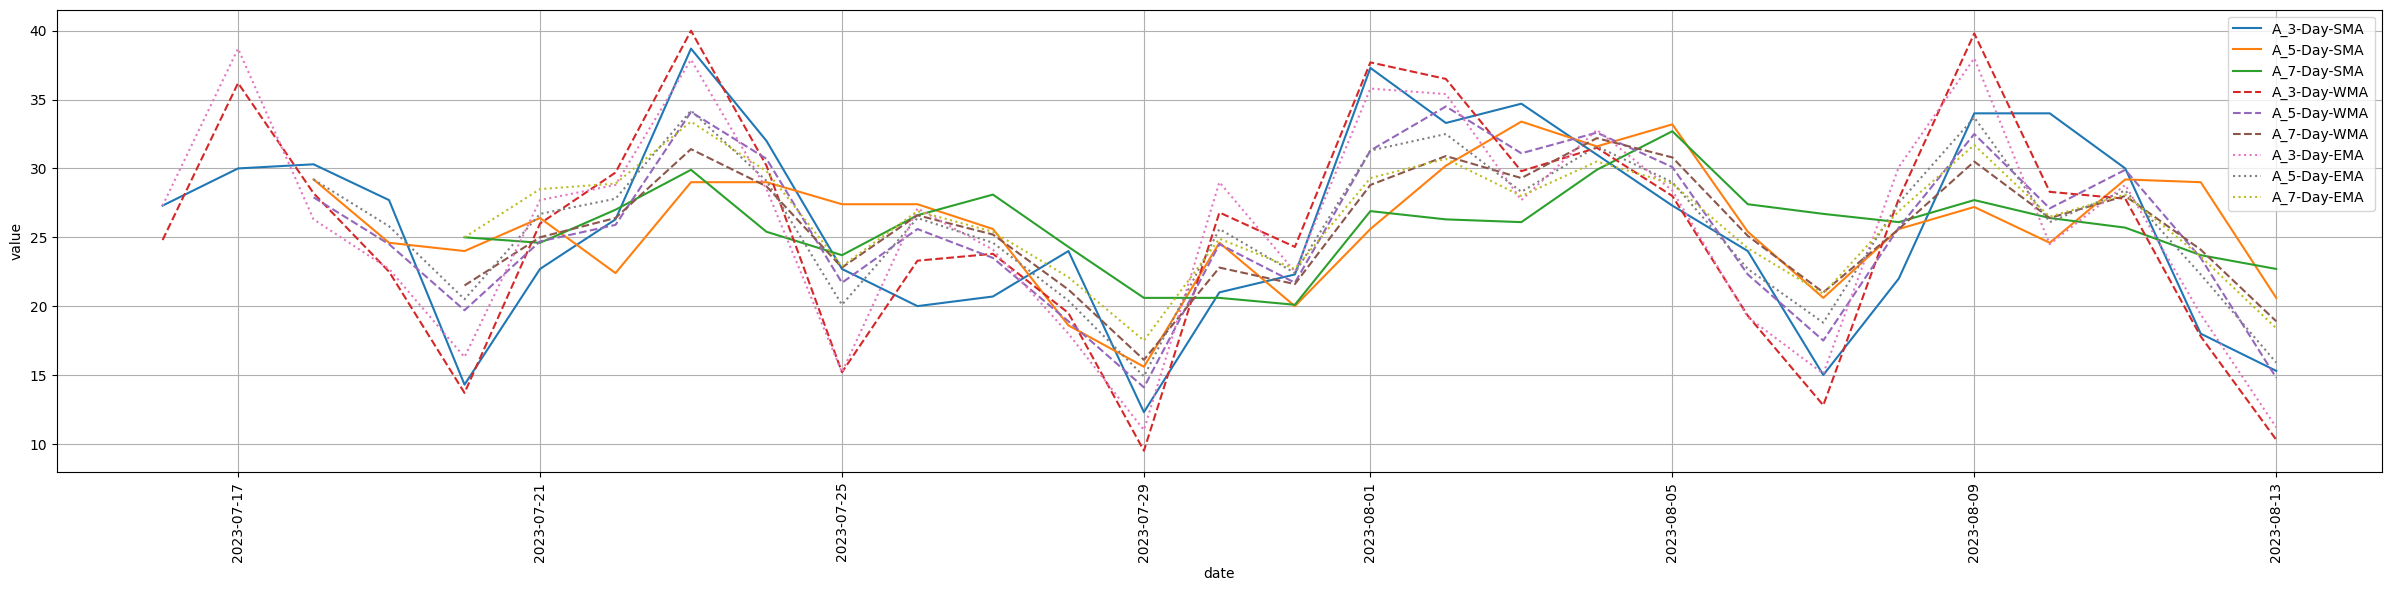

In [89]:
plt.figure(figsize=(30, 6))
plt.plot(df.index, df['A_3-Day-SMA'], linestyle = "solid", label='A_3-Day-SMA')
plt.plot(df.index, df['A_5-Day-SMA'], linestyle = "solid", label='A_5-Day-SMA')
plt.plot(df.index, df['A_7-Day-SMA'], linestyle = "solid", label='A_7-Day-SMA')
plt.plot(df.index, df['A_3-Day-WMA'], linestyle = "dashed",label='A_3-Day-WMA')
plt.plot(df.index, df['A_5-Day-WMA'], linestyle = "dashed",label='A_5-Day-WMA')
plt.plot(df.index, df['A_7-Day-WMA'], linestyle = "dashed",label='A_7-Day-WMA')
plt.plot(df.index, df['A_3-Day-EMA'], linestyle = "dotted",label='A_3-Day-EMA')
plt.plot(df.index, df['A_5-Day-EMA'], linestyle = "dotted",label='A_5-Day-EMA')
plt.plot(df.index, df['A_7-Day-EMA'], linestyle = "dotted",label='A_7-Day-EMA')
plt.xlabel('date')
plt.ylabel('value')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

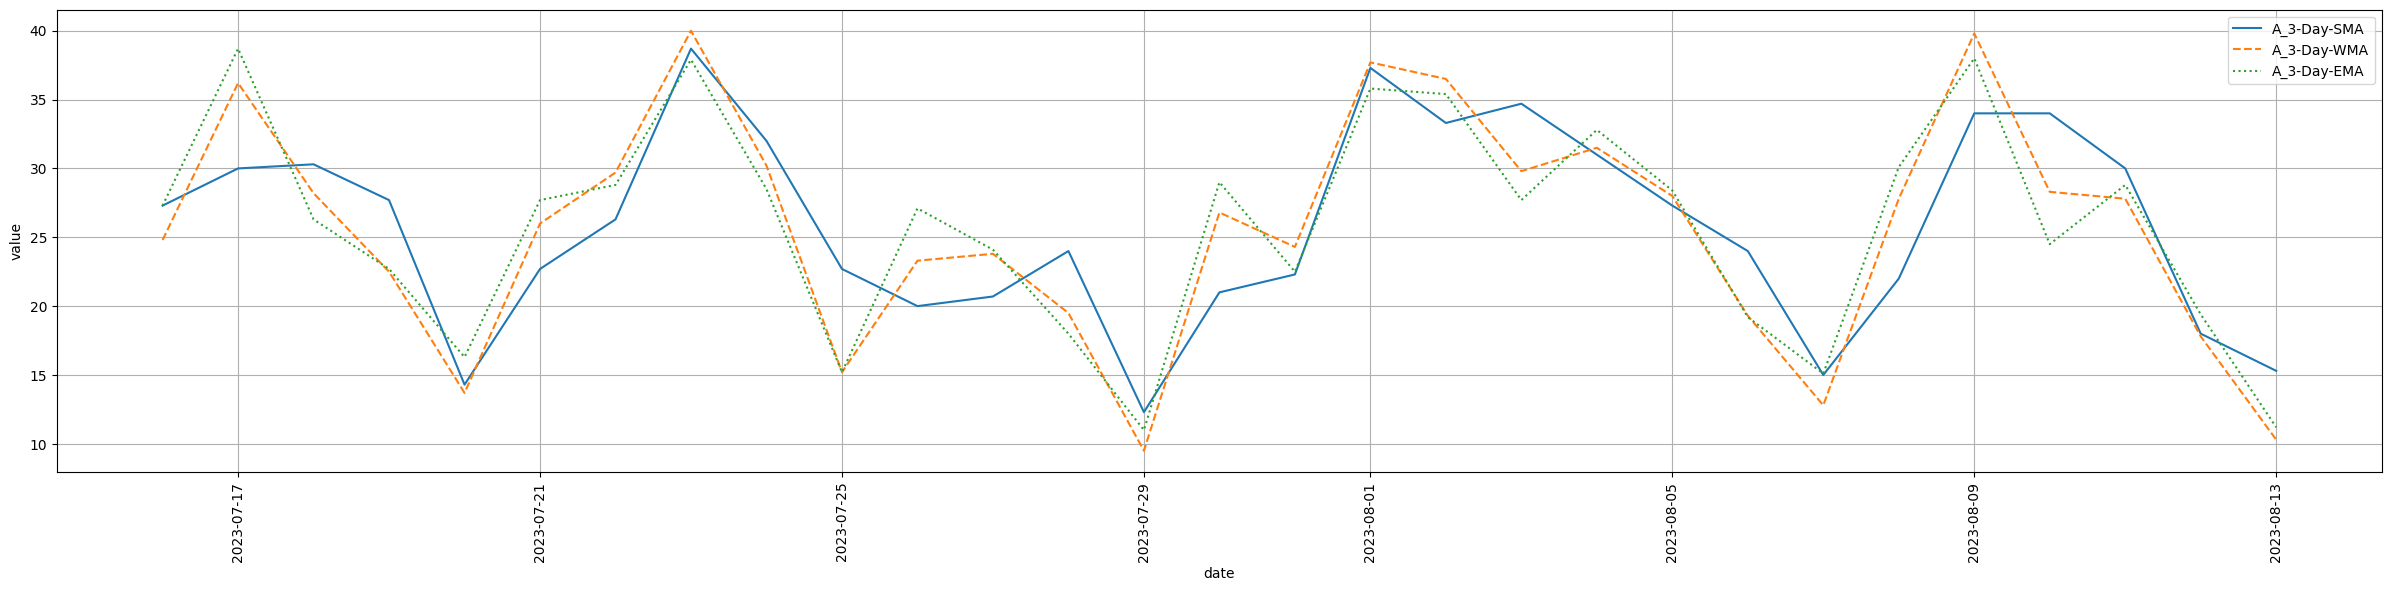

In [90]:
plt.figure(figsize=(30, 6))
plt.plot(df.index, df['A_3-Day-SMA'], linestyle = "solid", label='A_3-Day-SMA')
plt.plot(df.index, df['A_3-Day-WMA'], linestyle = "dashed",label='A_3-Day-WMA')
plt.plot(df.index, df['A_3-Day-EMA'], linestyle = "dotted",label='A_3-Day-EMA')

plt.xlabel('date')
plt.ylabel('value')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()